In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"E:\Programming\Machine Learning\Data Preprocessing\new 2\no_null_dataset.csv")
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [4]:
df.isnull().sum()

Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    float64
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

DATA FORMATTING
->CHECKING AND MAKING SURE THAT ALL DATA IN CORRECT FORMAT(INT, FLOAT,TEXT, OTHER)

In [6]:
# convert ["bore", "stroke","peak-rpm","price","normalized-losses"] datatype as float
ls =["bore", "stroke","peak-rpm","price","normalized-losses"]
df[ls] = df[ls].astype('float')

In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    float64
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

DATA BINNING
->PROCESS OF TRANSFORMING CONTINOUS NUMERICAL VARIABLES INTO DISCRETE CATEGORICAL 'BINS' FOR GROUPED ANALYSIS

In [9]:
# CONVERT HORESEPOWER DATAYPE TO INT OR FLOAT
df['horsepower'] = df['horsepower'].astype('float')
df['horsepower'].dtypes

dtype('float64')

let visualize the horsepower data

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Text(0, 0.5, 'frequency count')

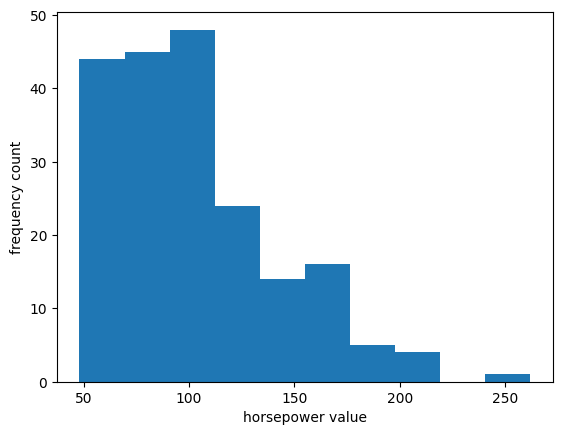

In [14]:
plt.hist(df['horsepower'])
plt.xlabel('horsepower value')
plt.ylabel('frequency count')

In [17]:
# create bins
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [18]:
# create group names
group_names = ['Low', 'Medium', 'High']

In [20]:
# perform binning
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


In [21]:
# see the frequency of each bin with value_counts()
df['horsepower-binned'].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0, 0.5, 'counts')

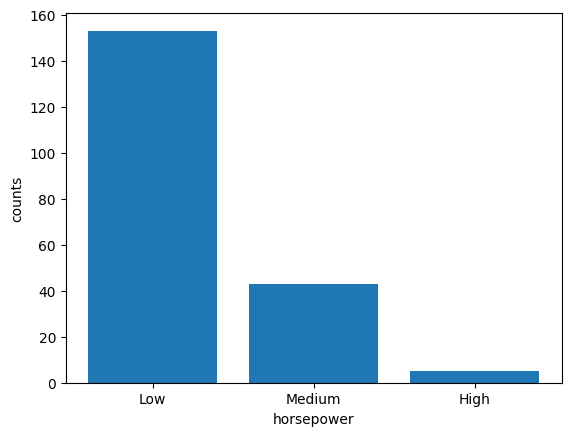

In [23]:
plt.bar(group_names, df['horsepower-binned'].value_counts())
plt.xlabel('horsepower')
plt.ylabel('counts')